In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

import os
import scipy.stats as stats

from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series

from sklearn.metrics import silhouette_score
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [32]:
def load_npy(filename):
    return np.load(filename)

In [33]:
# reload paa_sax-approximated time series
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

X_paa_sax_file = load_npy('X_paa_128_scaled.npz') 
X_paa_128 = X_paa_sax_file["arr_0"]

In [34]:
X_paa_sax_file = load_npy('X_paa_128.npz') 
X_paa_128 = X_paa_sax_file["arr_0"]

In [35]:
y

array(['happy', 'emo', 'world-music', ..., 'world-music', 'sleep',
       'sleep'], dtype='<U17')

In [36]:
X_paa_128.shape

(10000, 1, 128)

In [37]:
X_train = X_paa_128

In [38]:
df = pd.DataFrame(np.squeeze(X_train))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,4550.312094,4499.919058,4168.300059,4174.453651,3698.844993,3112.715197,3339.439143,2916.242393,3508.167154,2760.119019,...,3998.697089,3212.956979,3788.371686,4012.528524,4026.751152,4133.787630,3797.509289,3681.492072,3807.318819,3719.443855
1,1440.852373,2536.917624,1335.330216,2880.848492,2460.459681,2672.066986,1938.660644,2020.103313,2982.154521,2293.274509,...,2194.715106,3137.820630,1593.091469,2643.351945,2441.934507,2180.524827,2082.339408,2954.675244,2909.052273,2524.373359
2,604.513590,644.407242,683.031206,708.107355,706.327098,687.324596,653.278235,561.690127,591.259488,531.301186,...,820.275300,627.803791,537.498477,533.944152,449.857748,556.042076,520.932679,565.655395,643.577682,597.488492
3,2435.247269,2428.420721,2442.794629,2750.309975,2821.603662,2522.564045,2770.817764,2728.531899,2380.422975,2474.073995,...,2366.127322,2078.827040,2287.868809,2268.399049,2037.436897,2412.169573,2441.809680,2134.479209,2248.825989,2442.097685
4,2166.637658,2105.676197,2310.473496,2180.480932,2691.217867,3964.923842,3074.513426,3089.996501,3879.512210,2562.618512,...,2536.120652,2716.985287,3001.582293,3481.608947,3296.360726,3020.573876,2699.327323,2529.193894,2417.976289,2222.677179


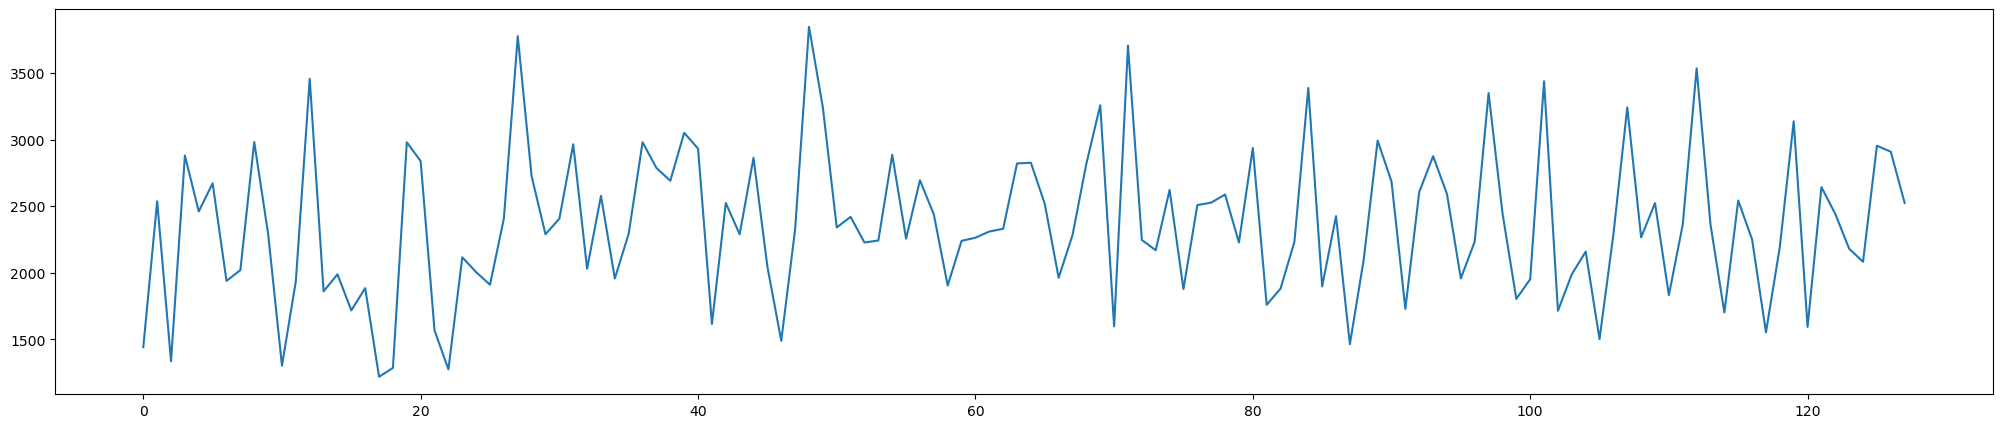

In [39]:
plt.figure(figsize=(25,5))
plt.plot(df.loc[1])
plt.show()

## Distance-based Clustering

k=  2 :  109811.92344169425
k=  3 :  108820.0919999951
k=  4 :  108041.3929118569
k=  5 :  107547.14909897017
k=  6 :  107137.44279537752
k=  7 :  106757.21328797677
k=  8 :  106463.23818837928
k=  9 :  106185.90831787497
k=  10 :  105959.24619934594
k=  12 :  105503.75338141994
k=  14 :  105183.54438870974
k=  16 :  104900.84140205182
k=  18 :  104628.6878532556
k=  20 :  104424.98998440214
k=  22 :  104229.99804703332
k=  24 :  104013.28872198492
k=  26 :  103865.68736281844
k=  28 :  103687.97483666487
k=  30 :  103522.40422135766
k=  35 :  103212.9292895272
k=  40 :  102893.22728292624


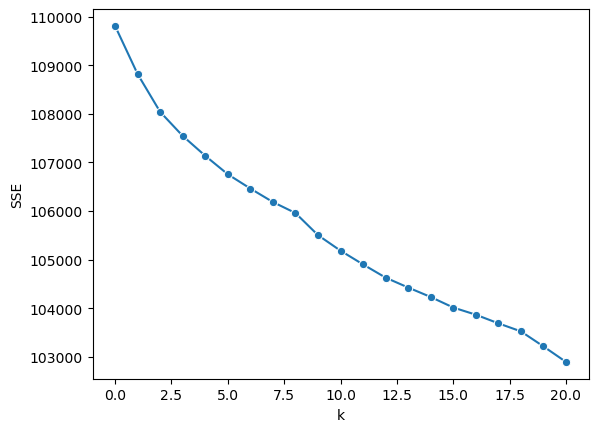

In [9]:
#ricerca di k
sse_list = []

ks = [2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30,35,40]

#distance_params = {'itakura_max_slope': 0.5, 'weighted': True}
for k in ks:
    clusterer = TimeSeriesKMeans(n_clusters=k, metric="euclidean")
    clusterer.fit(X_train)
    print("k= ", k, ": ", clusterer.inertia_)
    sse_list.append(clusterer.inertia_)
    
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

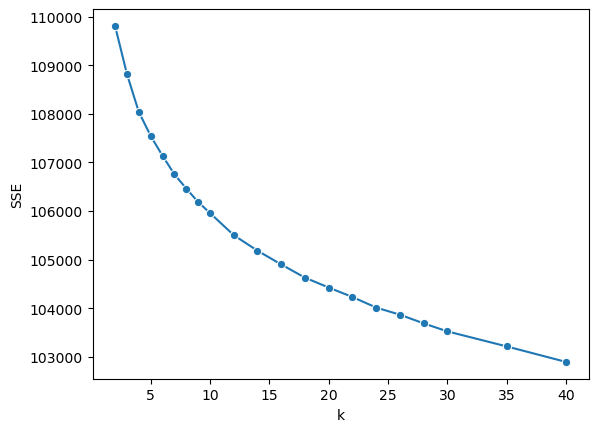

In [11]:
sns.lineplot(x=ks, y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

### euclidean

In [139]:
clusterer = TimeSeriesKMeans(n_clusters=3, metric="euclidean")

In [140]:
#distance_params = {'window': 0.3, 'weighted': True}
#distance_params = {'itakura_max_slope': 0.5, 'weighted': True}
#clusterer = TimeSeriesKMeans(n_clusters=8, metric="dtw", distance_params=distance_params)

In [141]:
%%time
clusterer.fit(X_train)

CPU times: total: 14.1 s
Wall time: 14.5 s


TimeSeriesKMeans(metric='euclidean', n_clusters=3)

In [142]:
print('Silhouette', silhouette_score(df, clusterer.labels_))

Silhouette 0.27569250467938583


In [143]:
df["cluster"] = clusterer.labels_
labels = clusterer.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,cluster
0,4550.312094,4499.919058,4168.300059,4174.453651,3698.844993,3112.715197,3339.439143,2916.242393,3508.167154,2760.119019,...,3212.956979,3788.371686,4012.528524,4026.751152,4133.787630,3797.509289,3681.492072,3807.318819,3719.443855,2
1,1440.852373,2536.917624,1335.330216,2880.848492,2460.459681,2672.066986,1938.660644,2020.103313,2982.154521,2293.274509,...,3137.820630,1593.091469,2643.351945,2441.934507,2180.524827,2082.339408,2954.675244,2909.052273,2524.373359,0
2,604.513590,644.407242,683.031206,708.107355,706.327098,687.324596,653.278235,561.690127,591.259488,531.301186,...,627.803791,537.498477,533.944152,449.857748,556.042076,520.932679,565.655395,643.577682,597.488492,1
3,2435.247269,2428.420721,2442.794629,2750.309975,2821.603662,2522.564045,2770.817764,2728.531899,2380.422975,2474.073995,...,2078.827040,2287.868809,2268.399049,2037.436897,2412.169573,2441.809680,2134.479209,2248.825989,2442.097685,2
4,2166.637658,2105.676197,2310.473496,2180.480932,2691.217867,3964.923842,3074.513426,3089.996501,3879.512210,2562.618512,...,2716.985287,3001.582293,3481.608947,3296.360726,3020.573876,2699.327323,2529.193894,2417.976289,2222.677179,2


In [144]:
df_genred = df.copy()
df_genred["genre"] = y
df_genred = df_genred[["genre", "cluster"]]

In [145]:
def mostra_prevalenza_generi(labels):
    global X_train_iso
    global X_train_tsne
    
    n = len(set(labels))
    if(max(set(labels))==n):
        labels= labels -1
        
    df_genred["cluster"] = labels
    cluster_sizes = df_genred.groupby('cluster').size();
    
    print("#### Come i generi si distribuiscono per cluster")
    print(df_genred.groupby('cluster').value_counts()/500*100)
    
    print("\n\n\n\n#### Percentuale genere per ogni cluster ####")
    
    for i in range(0,n):
        print()
        print()
        
        print("cluster ", i, "size :", cluster_sizes[i], "\n", df_genred.groupby('cluster').value_counts()[i]/cluster_sizes[i]*100)

    print()
    print()

    iso = Isomap(n_components=n)
    X_train_iso = iso.fit_transform(X_train.reshape(10000,128))
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=labels, label=labels, cmap=plt.cm.prism, edgecolor='k', alpha=0.7, s=30)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
    ax.add_artist(legend1)
    plt.show()
    
    tsne = TSNE(n_components=n)
    X_train_tsne = tsne.fit_transform(X_train.reshape(10000,128))

    fig, ax = plt.subplots()
    scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels, label=labels, cmap=plt.cm.prism, edgecolor='k', alpha=0.7, s=30)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
    ax.add_artist(legend1)
    plt.show()    


#### Come i generi si distribuiscono per cluster
cluster  genre            
0        honky-tonk           77.6
         mpb                  72.0
         songwriter           66.6
         opera                66.2
         sertanejo            64.0
         folk                 63.2
         world-music          50.8
         minimal-techno       49.0
         goth                 48.6
         emo                  43.4
         kids                 37.2
         synth-pop            36.4
         salsa                33.2
         progressive-house    26.0
         heavy-metal          26.0
         new-age              23.2
         sleep                21.4
         piano                16.8
         j-idol               14.2
         happy                 6.8
1        piano                76.8
         new-age              74.8
         sleep                48.4
         opera                25.6
         songwriter           22.2
         folk                 16.8
         honky

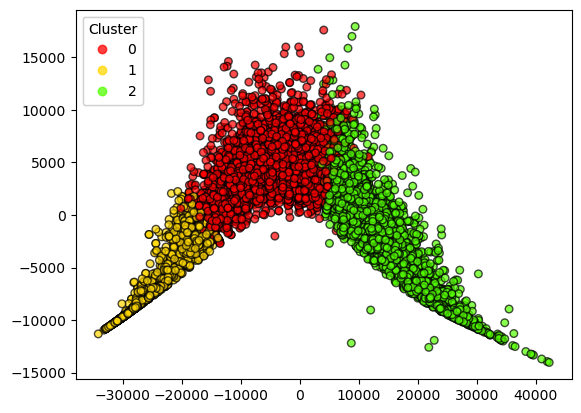

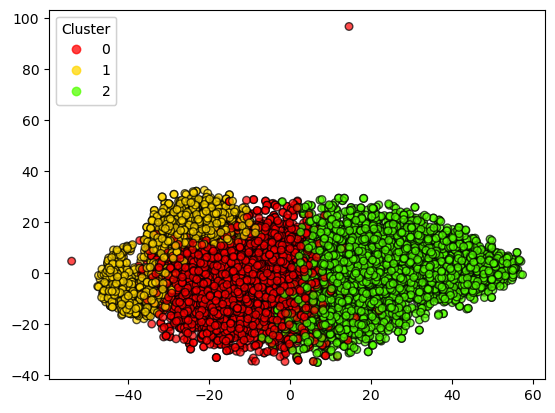

In [146]:
mostra_prevalenza_generi(labels)

In [147]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
df_melt.head()

,cluster,time,observation
0,2,0,4550.312094
1,0,0,1440.852373
2,1,0,604.513590
3,2,0,2435.247269
4,2,0,2166.637658


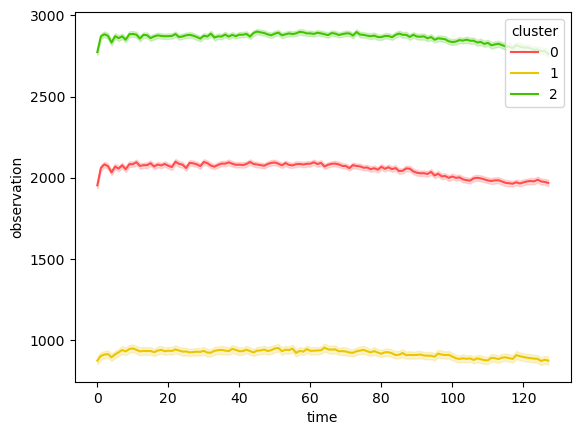

In [148]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", palette=["#FF4C4C","#EBC600","#40C400"])
plt.show()

## Features-based Clustering

In [112]:
from sktime.transformations.series.summarize import SummaryTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [113]:
X_train.shape

(10000, 1, 128)

In [114]:
transformer = SummaryTransformer()

In [115]:
F_train = transformer.fit_transform(X_train)

In [116]:
F_train

,mean,std,min,max,0.1,0.25,0.5,0.75,0.9
instances,,,,,,,,,
0,3719.579780,487.964838,2760.119019,4787.809083,3056.903408,3272.655236,3720.931170,4166.557848,4337.912769
1,2362.229186,562.550031,1218.673130,3847.829748,1610.017526,1957.399175,2301.608494,2702.292717,3010.651187
2,676.490809,126.603593,449.857748,1032.266254,528.655931,564.664078,669.951409,762.957278,844.021850
3,2463.979199,254.494118,2037.436897,3942.201938,2213.207290,2341.596272,2429.042197,2553.606755,2725.635616
4,2723.475733,491.725875,1993.851497,3964.923842,2101.431607,2307.690262,2685.029460,3032.707013,3395.916581
...,...,...,...,...,...,...,...,...,...
9995,2452.399788,578.198528,1150.138670,4002.582905,1794.537679,2066.988947,2390.569264,2848.521144,3184.156561
9996,611.140595,102.856653,412.192432,861.884621,476.100555,527.231012,608.636625,675.875225,757.284593
9997,2367.021268,379.438893,950.494732,3546.034913,1985.677400,2119.946357,2318.893312,2605.711937,2795.383716


In [117]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [133]:
#plt.rcParams.update(plt.rcParamsDefault)

# Ward

In [134]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='ward')
model = model.fit(F_train)

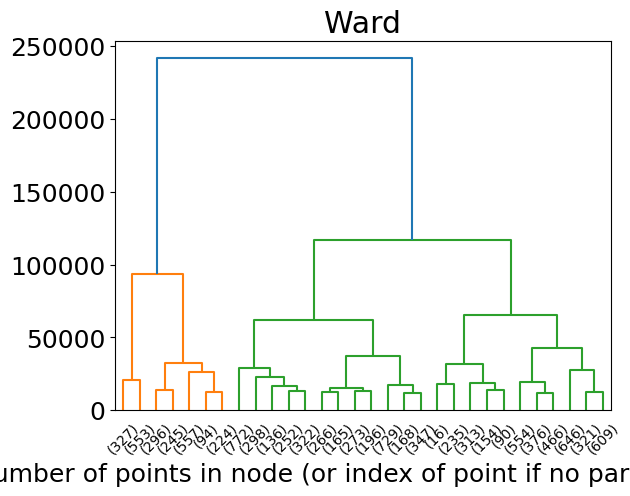

In [120]:
plt.title("Ward")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=150000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [135]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=150000, criterion='distance')
labels

array([2, 2, 1, ..., 2, 1, 1], dtype=int32)

In [136]:
print('Silhouette', silhouette_score(F_train, labels))

Silhouette 0.510085131722314


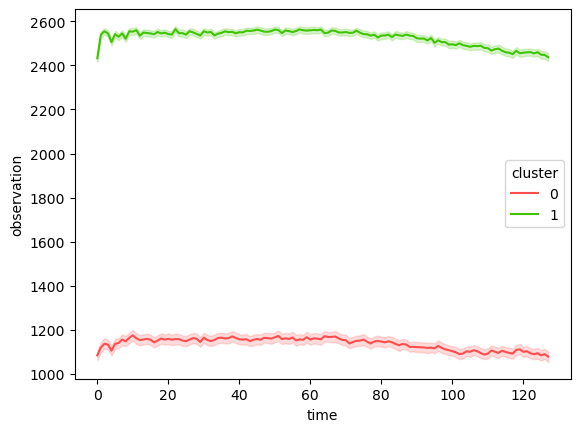

In [138]:
df["cluster"] = labels-1
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", palette=["#FF4C4C","#40C400"])

plt.show()

#### Come i generi si distribuiscono per cluster
cluster  genre            
0        new-age              85.8
         piano                79.8
         sleep                56.2
         opera                50.4
         honky-tonk           38.4
         songwriter           37.8
         folk                 31.2
         minimal-techno       22.2
         world-music          16.4
         mpb                  11.4
         goth                  8.2
         emo                   5.8
         synth-pop             5.6
         kids                  3.2
         salsa                 2.8
         progressive-house     1.6
         sertanejo             1.0
         heavy-metal           0.6
         happy                 0.6
         j-idol                0.2
1        j-idol               99.8
         heavy-metal          99.4
         happy                99.4
         sertanejo            99.0
         progressive-house    98.4
         salsa                97.2
         kids 

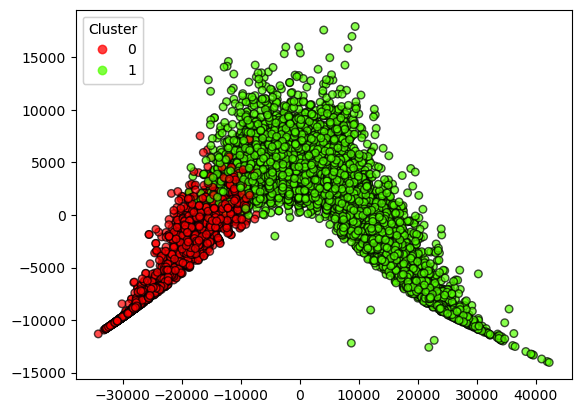

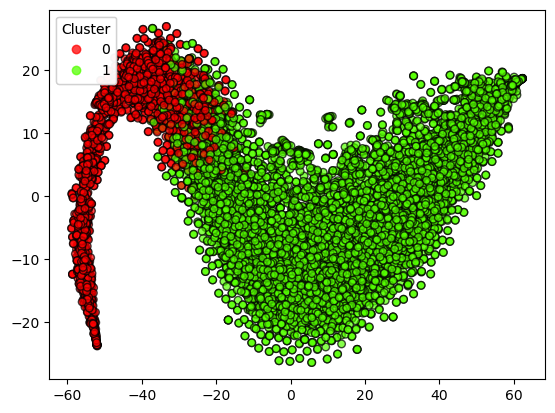

In [72]:
mostra_prevalenza_generi(labels)

## complete
# completee

In [121]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='complete')
model = model.fit(F_train)

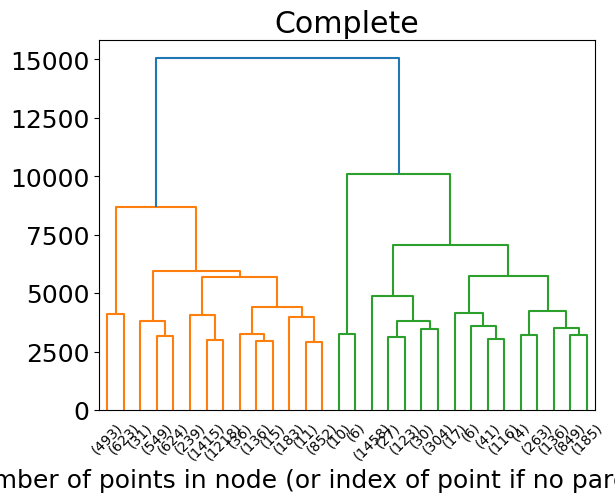

In [122]:
plt.title("Complete")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=12000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [77]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=12000, criterion='distance')
labels

array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

In [78]:
print('Silhouette', silhouette_score(F_train, labels))

Silhouette 0.2839155009216811


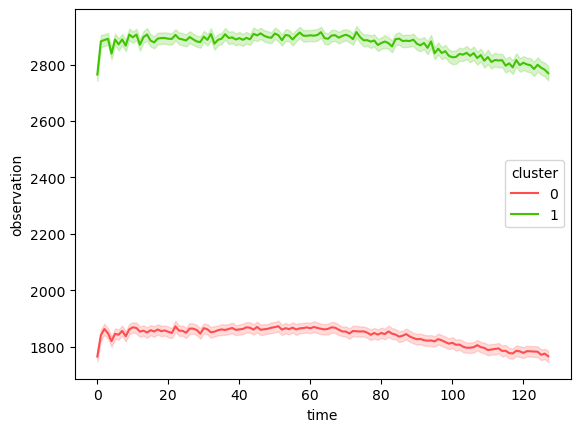

In [79]:
df["cluster"] = labels-1
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", palette=["#FF4C4C","#40C400"])
plt.show()

#### Come i generi si distribuiscono per cluster
cluster  genre            
0        new-age              98.2
         honky-tonk           95.6
         opera                95.0
         piano                94.6
         songwriter           87.2
         folk                 82.4
         world-music          73.4
         sleep                73.2
         mpb                  73.2
         sertanejo            68.2
         goth                 66.6
         minimal-techno       64.6
         heavy-metal          57.4
         salsa                53.4
         synth-pop            44.4
         emo                  44.2
         kids                 35.6
         j-idol               32.6
         progressive-house    29.8
         happy                15.4
1        happy                84.6
         progressive-house    70.2
         j-idol               67.4
         kids                 64.4
         emo                  55.8
         synth-pop            55.6
         salsa

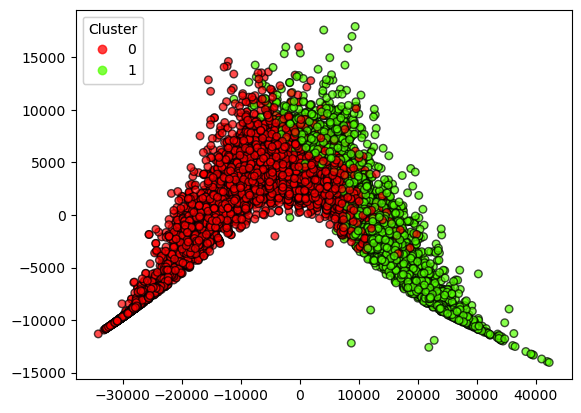

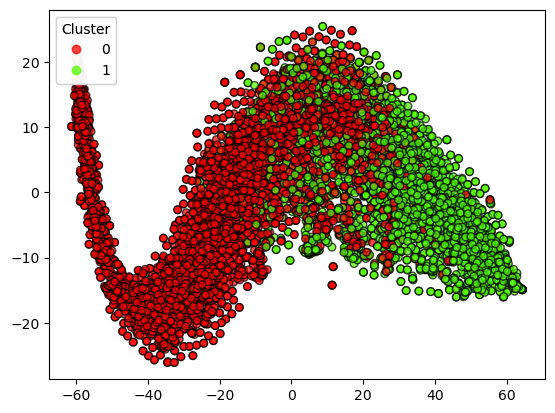

In [80]:
mostra_prevalenza_generi(labels)

# single

In [123]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='single')
model = model.fit(F_train)

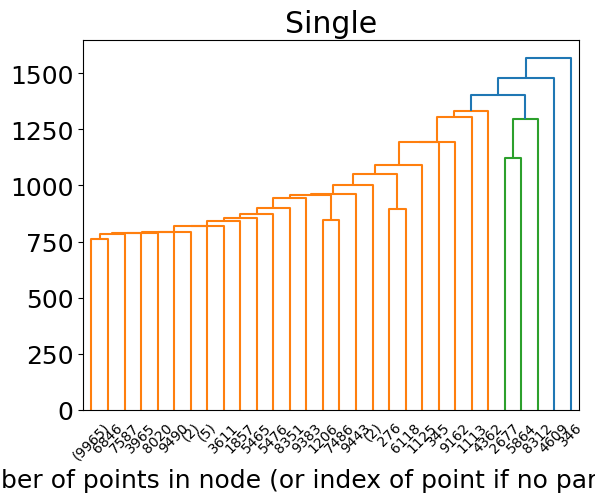

In [124]:
plt.title("Single")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=1400)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [86]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=1400, criterion='distance')
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [87]:
print('Silhouette', silhouette_score(F_train, labels))

Silhouette 0.3956853642607367


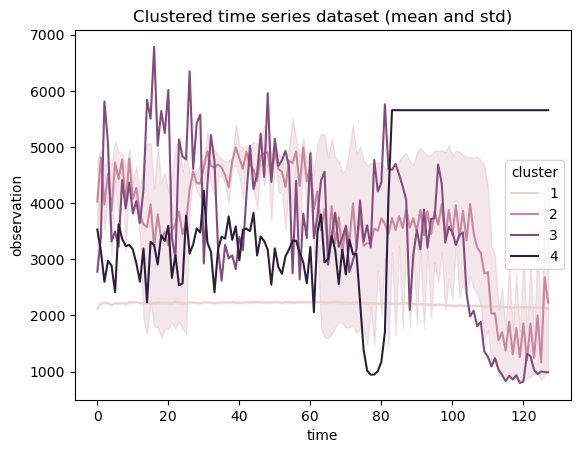

In [88]:
df["cluster"] = labels
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

#### Come i generi si distribuiscono per cluster
cluster  genre            
0        emo                  100.0
         folk                 100.0
         world-music          100.0
         synth-pop            100.0
         songwriter           100.0
         sertanejo            100.0
         salsa                100.0
         progressive-house    100.0
         piano                100.0
         opera                100.0
         new-age              100.0
         mpb                  100.0
         minimal-techno       100.0
         kids                 100.0
         j-idol               100.0
         honky-tonk           100.0
         heavy-metal          100.0
         happy                100.0
         goth                 100.0
         sleep                 99.6
1        sleep                  0.4
dtype: float64




#### Percentuale genere per ogni cluster ####


cluster  0 size : 7045 
 genre
emo                  7.097232
folk                 7.097232
world-musi

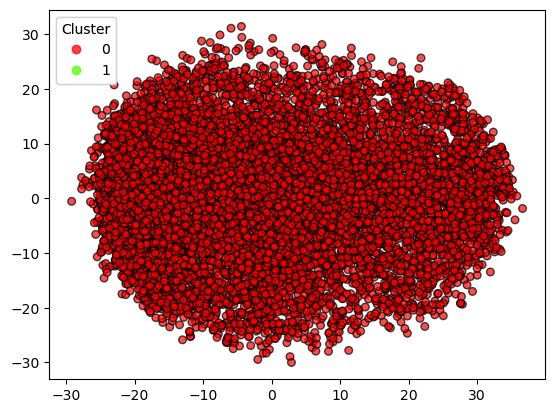

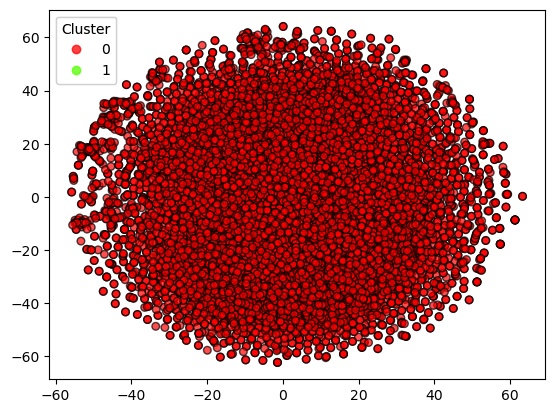

In [43]:
mostra_prevalenza_generi(labels)

# average

In [125]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='average')
model = model.fit(F_train)

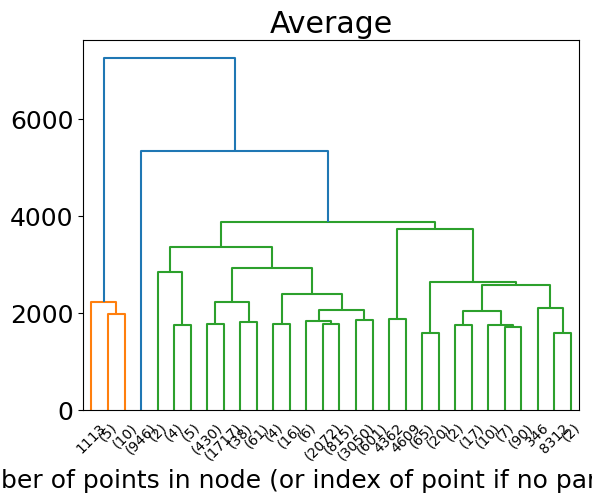

In [126]:
plt.title("Average")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=4500)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [92]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=4500, criterion='distance')
labels

array([3, 3, 2, ..., 3, 2, 2], dtype=int32)

In [93]:
print('Silhouette', silhouette_score(F_train, labels))

Silhouette 0.5190970045378653


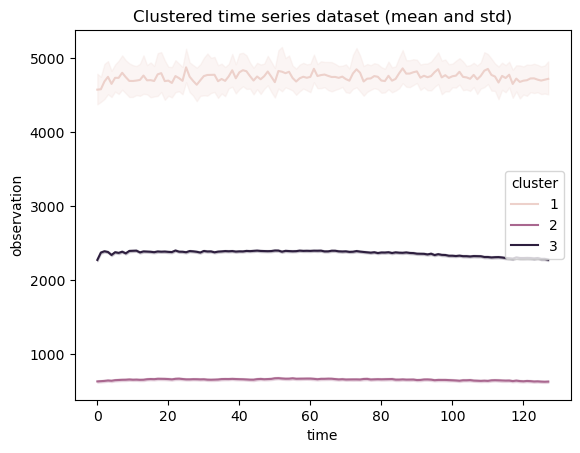

In [94]:
df["cluster"] = labels
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

#### Come i generi si distribuiscono per cluster
cluster  genre            
0        sleep                  2.6
         minimal-techno         0.4
         goth                   0.2
1        piano                 71.2
         new-age               55.6
         sleep                 43.0
         world-music            8.6
         opera                  5.0
         minimal-techno         1.2
         honky-tonk             1.0
         emo                    1.0
         synth-pop              0.8
         songwriter             0.6
         folk                   0.6
         goth                   0.4
         mpb                    0.2
2        sertanejo            100.0
         salsa                100.0
         progressive-house    100.0
         kids                 100.0
         j-idol               100.0
         heavy-metal          100.0
         happy                100.0
         mpb                   99.8
         goth                  99.4
         songwriter     

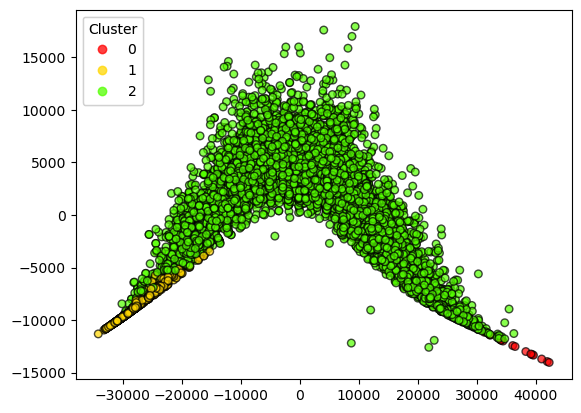

KeyboardInterrupt: 

In [95]:
mostra_prevalenza_generi(labels)

### vedere come le features sono distribuite nei cluster trovati

### visualizzare i cluster con almeno due tecniche di dimensionality reduction

## Motifs-based clustering

Per ogni time series (n) estraggo i top 3 motifs (di una certa lunghezza). Otteggo quindi 3*n motifs. A questo punto è possibile fare clustering sul nuovo dataset costituito dalle 3*n motifs (usando k means o euclidean, non dtw perché tanto sono molto brevi). Quindi troviamo cluster di motifs. 
	-Di nuovo verificare se qualche cluster di motifs è tipico di qualche genere ed eventualmente decidere se usare un motif come shapelet